In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [2]:
df.shape

(1456714, 23)

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [5]:
df.isnull().sum().sum()

187129

In [6]:
df[df["X Coordinate"].isnull() & df["Y Coordinate"].isnull() & df["Latitude"].isnull() & df["Longitude"].isnull() & df["Location"].isnull()].shape
#In 37083 rows we don t have the X Coordinate,Y Coordinate,Latitude,Longitude and Location

(37083, 23)

In [7]:
print('the null values just are the',(37083/1456714)*100,'% of my data.')

the null values just are the 2.5456609876750003 % of my data.


In [8]:
#We can't replace the missing data
#so I'm going to drop this 2.54% of my data
df.dropna(axis=0 , how='any' , inplace= True)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.shape

(1418365, 23)

In [11]:
#Drop column Unnamed
df=df.drop('Unnamed: 0',axis=1) 
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 22 columns):
ID                      1418365 non-null int64
Case Number             1418365 non-null object
Date                    1418365 non-null object
Block                   1418365 non-null object
IUCR                    1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Domestic                1418365 non-null bool
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
FBI Code                1418365 non-null object
X Coordinate            1418365 non-null float64
Y Coordinate            1418365 non-null float64
Year                    1418365 non-null int64
Updated On              1

In [13]:
#Convert Date column to Date Time format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')


In [14]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 22 columns):
ID                      1418365 non-null int64
Case Number             1418365 non-null object
Date                    1418365 non-null datetime64[ns]
Block                   1418365 non-null object
IUCR                    1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Domestic                1418365 non-null bool
Beat                    1418365 non-null int64
District                1418365 non-null float64
Ward                    1418365 non-null float64
Community Area          1418365 non-null float64
FBI Code                1418365 non-null object
X Coordinate            1418365 non-null float64
Y Coordinate            1418365 non-null float64
Year                    1418365 non-null int64
Updated On       

In [16]:
df["Primary Type"].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [17]:
df["District"].value_counts()

11.0    99950
8.0     94215
6.0     84688
4.0     83568
7.0     82116
25.0    81277
3.0     71554
9.0     69150
12.0    67616
10.0    64735
19.0    64117
5.0     63409
15.0    63130
18.0    61724
1.0     60156
2.0     58670
14.0    50931
16.0    48468
22.0    46213
17.0    40313
24.0    39260
20.0    23078
31.0       26
13.0        1
Name: District, dtype: int64

In [18]:
df["Year"].value_counts()

2012    334397
2013    304267
2014    269329
2015    259610
2016    250732
2017        30
Name: Year, dtype: int64

In [19]:
df["Arrest"].value_counts()

False    1047308
True      371057
Name: Arrest, dtype: int64

In [20]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06
mean,9.574675e+06,1.150282e+03,1.125518e+01,2.285474e+01,3.747455e+01,1.164399e+06,1.885510e+06,2.013851e+03,4.184144e+01,-8.767223e+01
std,8.011218e+05,6.916395e+02,6.904508e+00,1.379378e+01,2.142995e+01,1.843389e+04,3.413940e+04,1.423228e+00,9.399956e-02,6.637181e-02
min,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,8.987180e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152540e+06,1.858752e+06,2.013000e+03,4.176784e+01,-8.771529e+01
50%,9.575732e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166015e+06,1.891485e+06,2.014000e+03,4.185787e+01,-8.766614e+01
75%,1.019113e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176363e+06,1.908687e+06,2.015000e+03,4.190524e+01,-8.762812e+01
max,1.082334e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [21]:
df.describe(include=bool)

,Arrest,Domestic
count,1418365,1418365
unique,2,2
top,False,False
freq,1047308,1203231


In [22]:
df.describe(include=['O'])

,Case Number,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
count,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365
unique,1418258,32546,363,33,340,140,26,950,368079
top,HZ140230,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,06,02/04/2016 06:33:39 AM,"(41.883500187, -87.627876698)"
freq,6,3567,132848,321950,147845,325084,321950,906327,2093


In [23]:
df[df["Case Number"] == "HZ140230"]


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7439,22314,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
7440,22316,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
7441,22317,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
7442,22318,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
7443,22319,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"
1215137,22313,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"


Case number is a unique value,but as we see for the same case number we have 6 rows which means that we have a duplicated rows.

In [24]:
df.drop("ID",axis= 1 , inplace= True)

In [25]:
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [26]:
df=df.drop_duplicates()

In [27]:
df[df["Case Number"] == "HZ140230"]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7439,HZ140230,2016-02-04 13:00:00,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,...,16.0,63.0,01A,1158688.0,1866540.0,2016,05/20/2016 03:52:25 PM,41.789518,-87.69368,"(41.789518444, -87.693680468)"


In [28]:
df.shape

(1418315, 21)

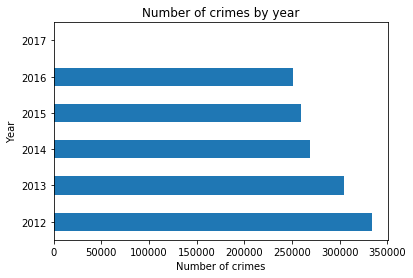

In [29]:
#how the crime numbers in Chicago have been year by year?
df.groupby([df.Year]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Year')
plt.title('Number of crimes by year')
plt.show()

The number of crimes is decreasing.

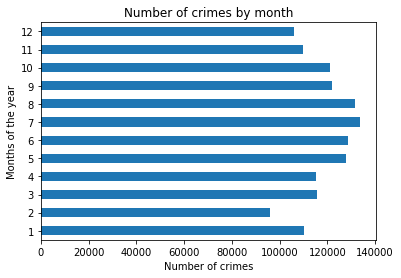

In [30]:
#how the crime numbers in Chicago have been month by month?

df.groupby([df.Date.dt.month]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Months of the year')
plt.title('Number of crimes by month')
plt.show()

In February we have the lowest number of crimes but we can not conclude because February has less number of days than other months.

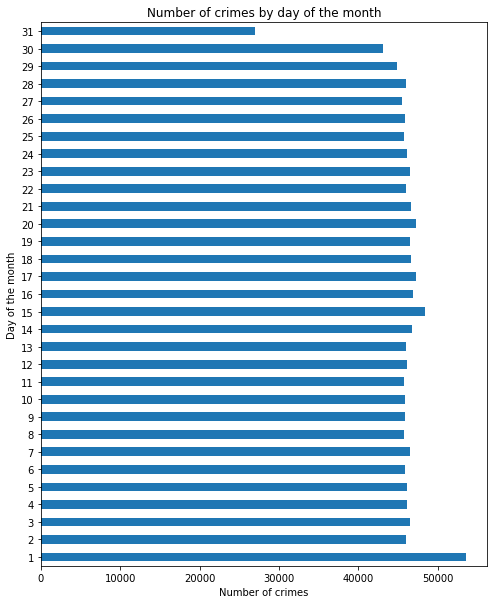

In [31]:
plt.figure(figsize=(8,10))
df.groupby([df.Date.dt.day]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Day of the month')
plt.title('Number of crimes by day of the month')
plt.show()

1st day of the month records most crimes.Also we see that 31st day has least number of crimes, but it can be because day 31 is only present in 7 months of the year and hence will have less crime records than any other day.

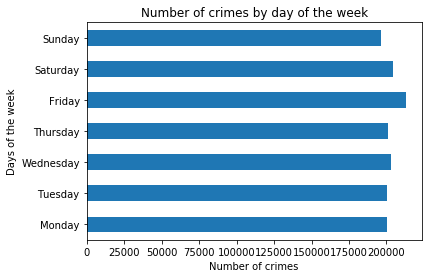

In [32]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.Date.dt.day_name()]).size().reindex(days) .plot(kind='barh')
plt.ylabel('Days of the week')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

More or less each day have similar crime numbers.


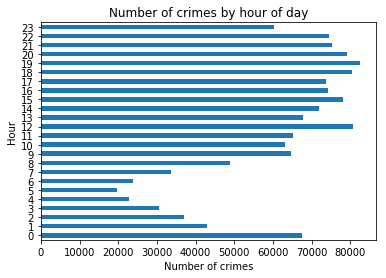

In [33]:
df.groupby([df.Date.dt.hour]).size().plot(kind='barh')
plt.ylabel('Hour')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by hour of day')
plt.show()

In [34]:
d={}
for x in range(24):
    if 5 <= x <= 11:
        d[x]="Morning"
    elif 12<= x <= 17:
        d[x]="Afternoon"
    elif 18<= x <= 22:
        d[x]="Evening"    
    else :
        d[x]="Night"
df["Time slice"]=df.Date.dt.hour.map(d)

df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time slice
0,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",Night
1,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Evening
2,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Night
3,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Evening
4,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Evening


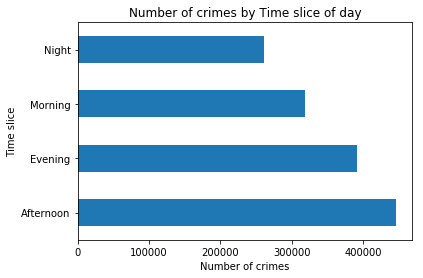

In [35]:
df.groupby([df["Time slice"]]).size().plot(kind='barh')
plt.ylabel('Time slice')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Time slice of day')
plt.show()

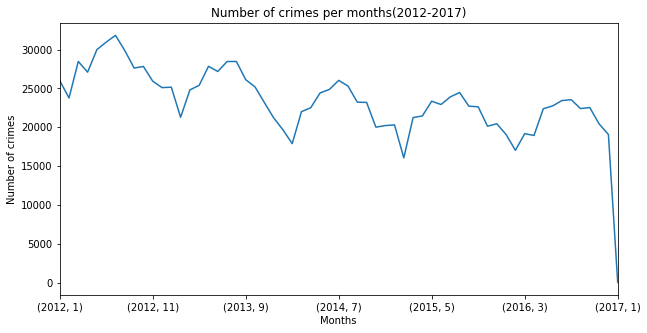

In [36]:
plt.figure(figsize=(10,5))
df.groupby([df["Year"],df.Date.dt.month]).size().plot()
plt.ylabel('Number of crimes')
plt.xlabel('Months')
plt.title('Number of crimes per months(2012-2017)')
plt.show()

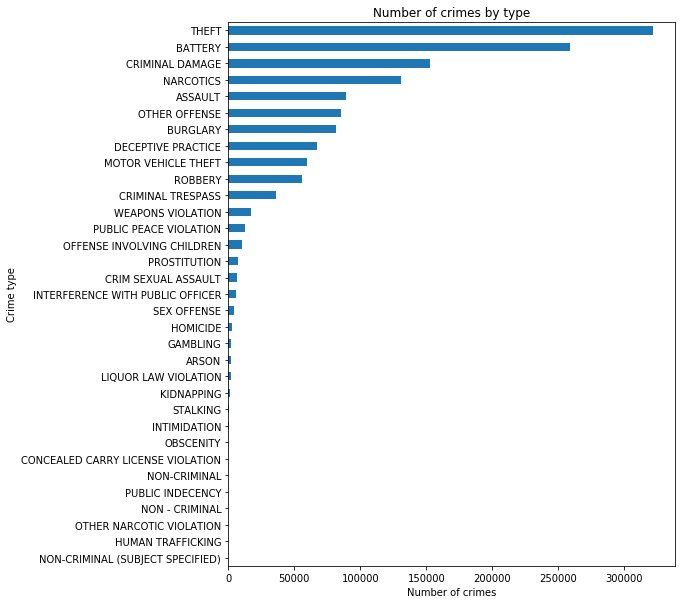

In [37]:
#Different types of crimes in Chicago?
plt.figure(figsize=(8,10))
df.groupby([df["Primary Type"]]).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Crime type')
plt.title('Number of crimes by type')
plt.show()

Theft is the most common crime in Chicago followed by Battery and criminal damage...<br/>
We have 33 crime types but we can remove the data points which recorded a very few cases to reduce the size and complexity of our data.

In [38]:
primary_type=df.groupby([df["Primary Type"]]).size().sort_values(ascending=True)
primary_type=primary_type[-10:]
df["Top_10_primary_type"]=df["Primary Type"].map(lambda x: x if x in primary_type else "other")
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time slice,Top_10_primary_type
0,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",Night,BATTERY
1,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Evening,BATTERY
2,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Night,other
3,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Evening,BATTERY
4,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Evening,THEFT


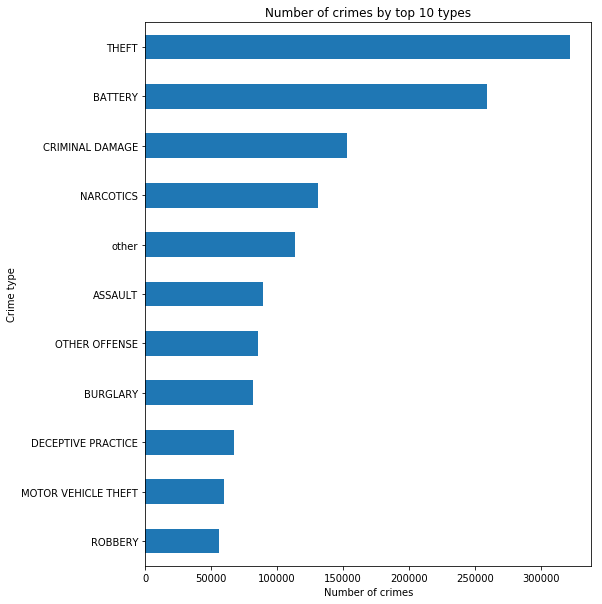

In [39]:
#Different types of crimes in Chicago?
plt.figure(figsize=(8,10))
df.groupby([df["Top_10_primary_type"]]).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Crime type')
plt.title('Number of crimes by top 10 types')
plt.show()

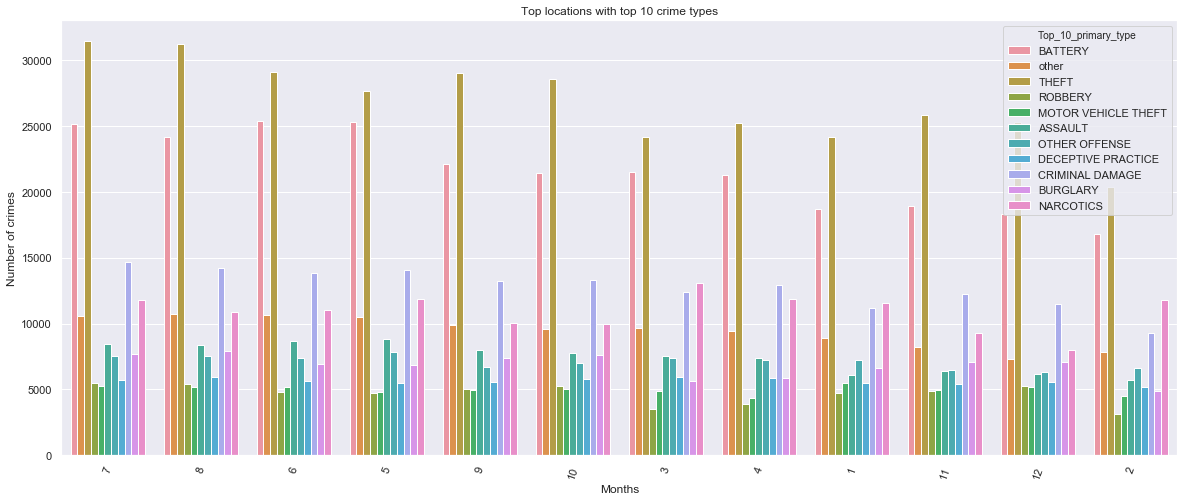

In [40]:
#How/What is the distribution of top crimes per month?
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax = sns.countplot(x=df.Date.dt.month, hue='Top_10_primary_type', data=df,order=df.Date.dt.month.value_counts().index)
plt.title("Top locations with top 10 crime types")
plt.xlabel("Months")
plt.ylabel("Number of crimes")

ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

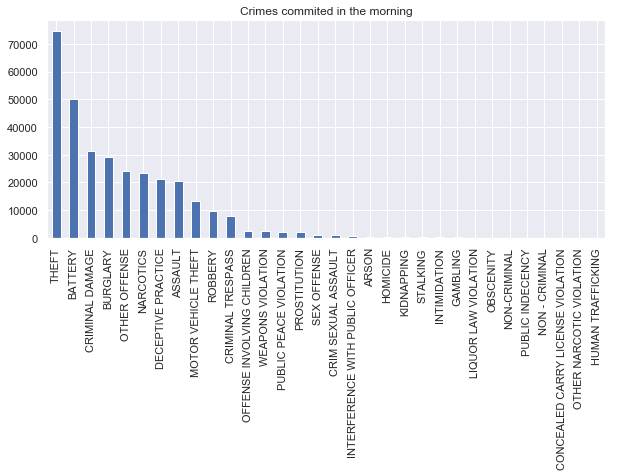

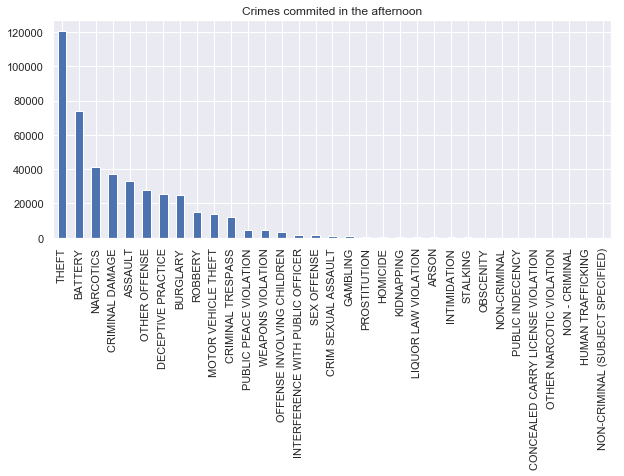

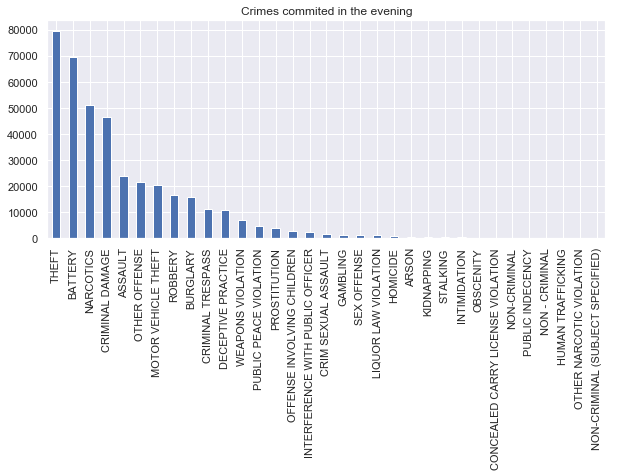

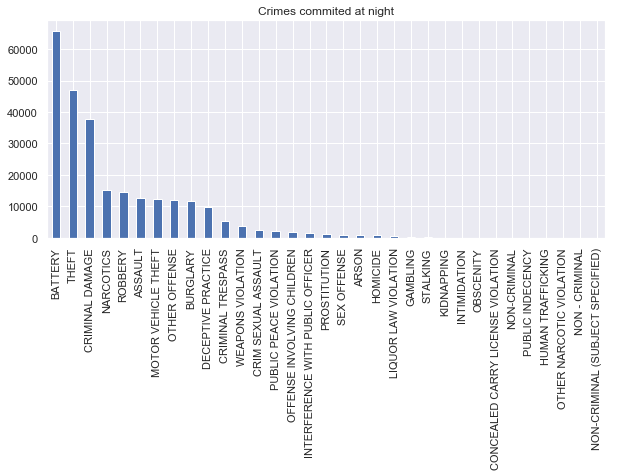

In [41]:
#type of crimes recorded in different time slices?
plt.figure(figsize=(10,4))
df[df["Time slice"] == "Morning"]['Primary Type'].value_counts().plot.bar()
plt.title("Crimes commited in the morning")
plt.show()

plt.figure(figsize=(10,4))
df[df["Time slice"] == "Afternoon"]['Primary Type'].value_counts().plot.bar()
plt.title("Crimes commited in the afternoon")
plt.show()

plt.figure(figsize=(10,4))
df[df["Time slice"] == "Evening"]['Primary Type'].value_counts().plot.bar()
plt.title("Crimes commited in the evening")
plt.show()

plt.figure(figsize=(10,4))
df[df["Time slice"] == "Night"]['Primary Type'].value_counts().plot.bar()
plt.title("Crimes commited at night")
plt.show()

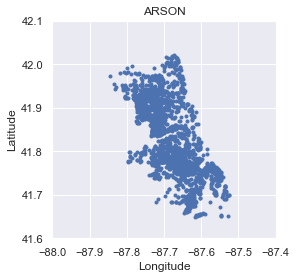

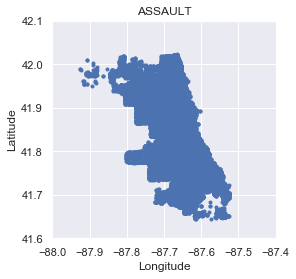

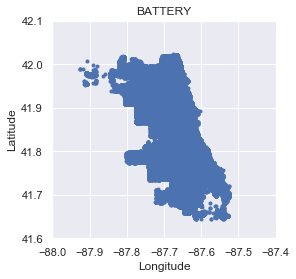

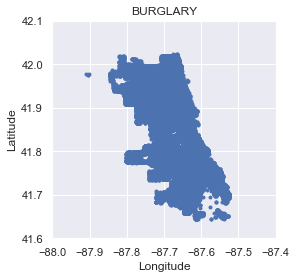

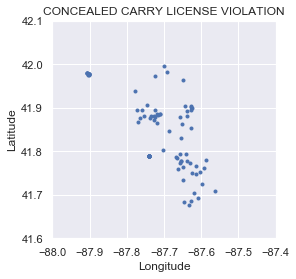

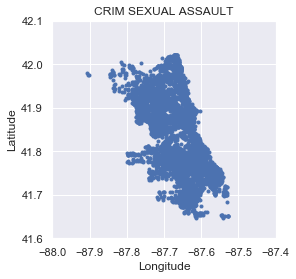

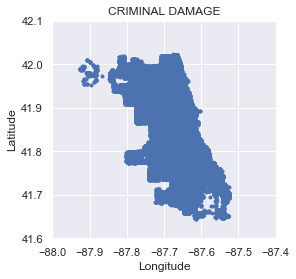

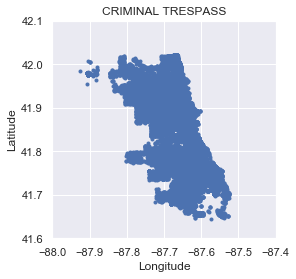

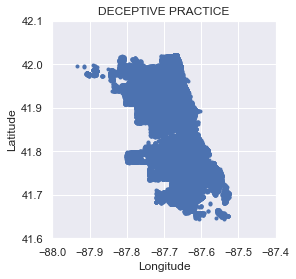

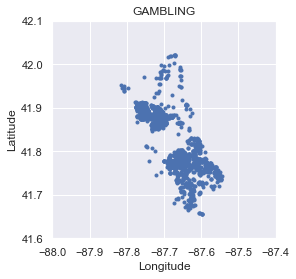

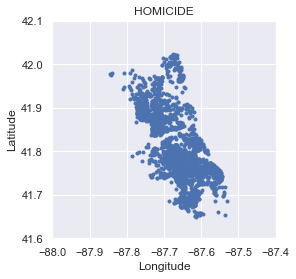

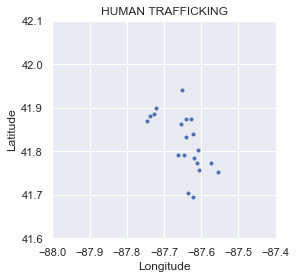

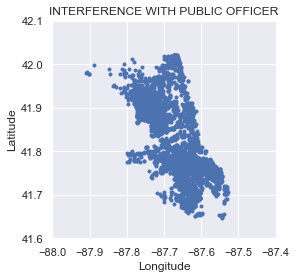

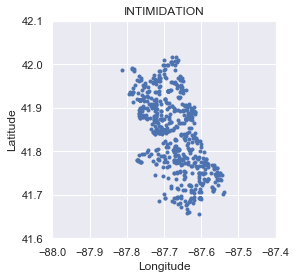

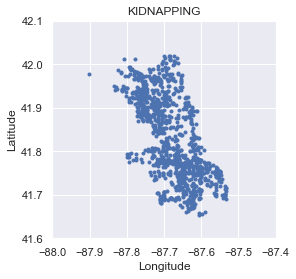

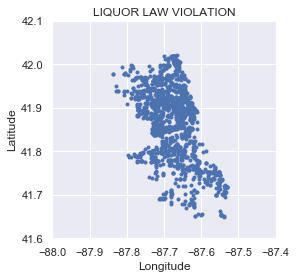

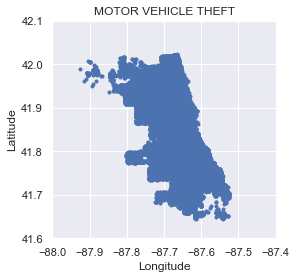

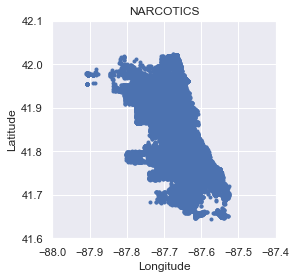

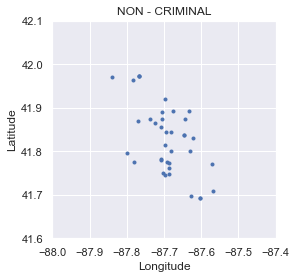

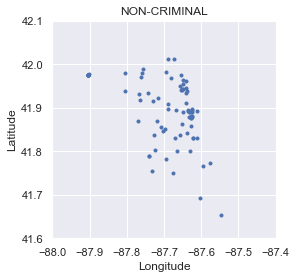

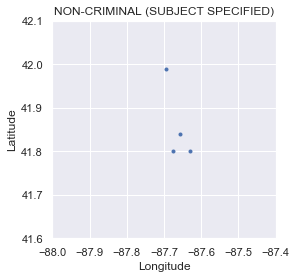

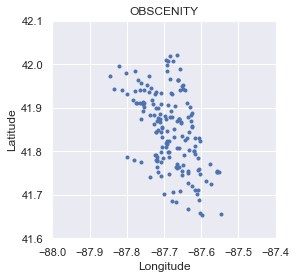

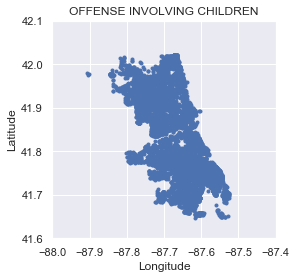

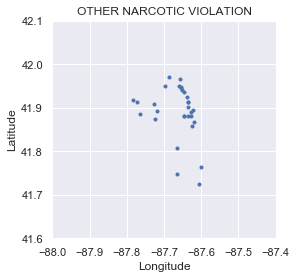

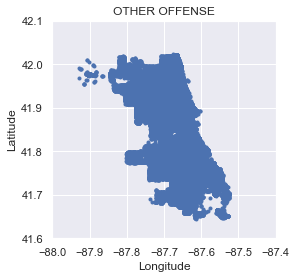

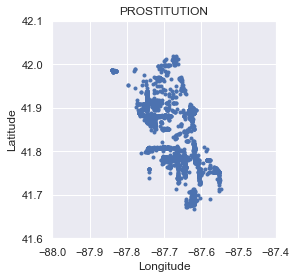

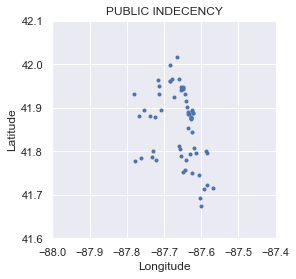

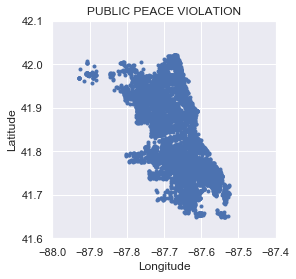

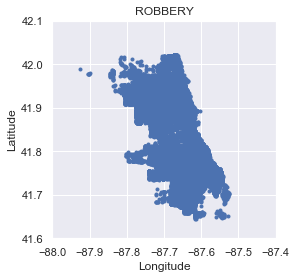

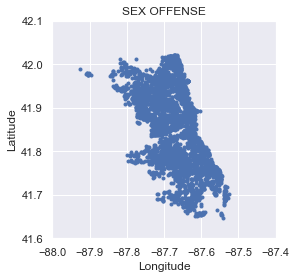

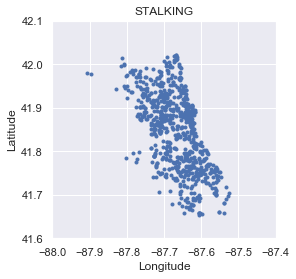

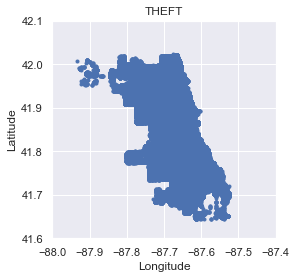

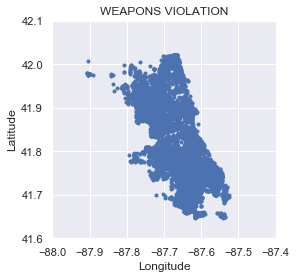

In [42]:
#What is the distribution of crime types in different locations(latitude and longitude)?
df_primary_type = df.groupby(df['Primary Type'])
df_primary_type = dict(list(df_primary_type))
Keys = list(df_primary_type.keys())
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.scatter(df_primary_type[key].Longitude, df_primary_type[key].Latitude, marker = '.')
    plt.ylim(41.6,42.1)
    plt.xlim(-88,-87.4)
    plt.title(key)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

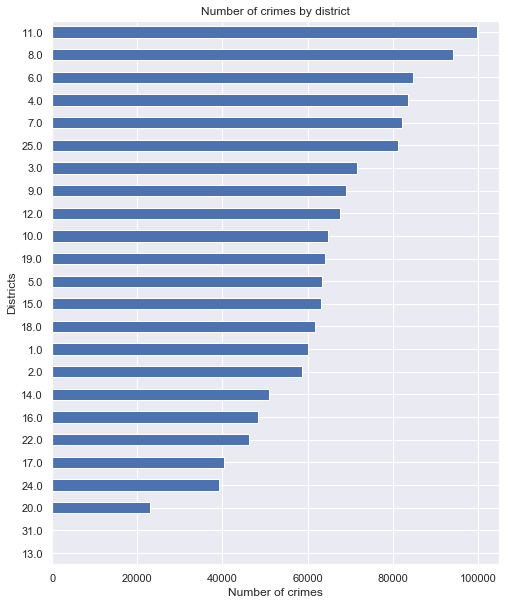

In [43]:
#Which district recorded most crimes and which district recorded the least?
plt.figure(figsize=(8,10))
df.groupby([df["District"]]).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Districts')
plt.title('Number of crimes by district')
plt.show()

The  District number 11 and 8 are the most unsafe followed by 6, 4, 7 and 25. <br/>
The safest district in Chicago are District number 13 and 31

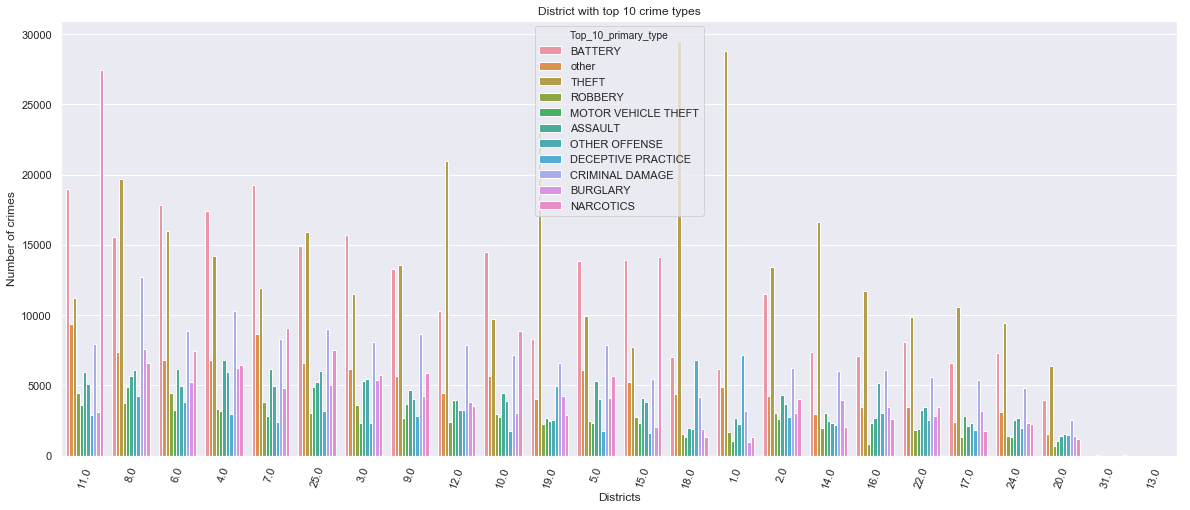

In [44]:
#for one district x ,Which is the most common crime in x?
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='District', hue='Top_10_primary_type', data=df,order=df['District'].value_counts().index)
plt.title("District with top 10 crime types")
plt.xlabel("Districts")
plt.ylabel("Number of crimes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

Text(0.5, 1.0, 'All Crime Distribution per District')

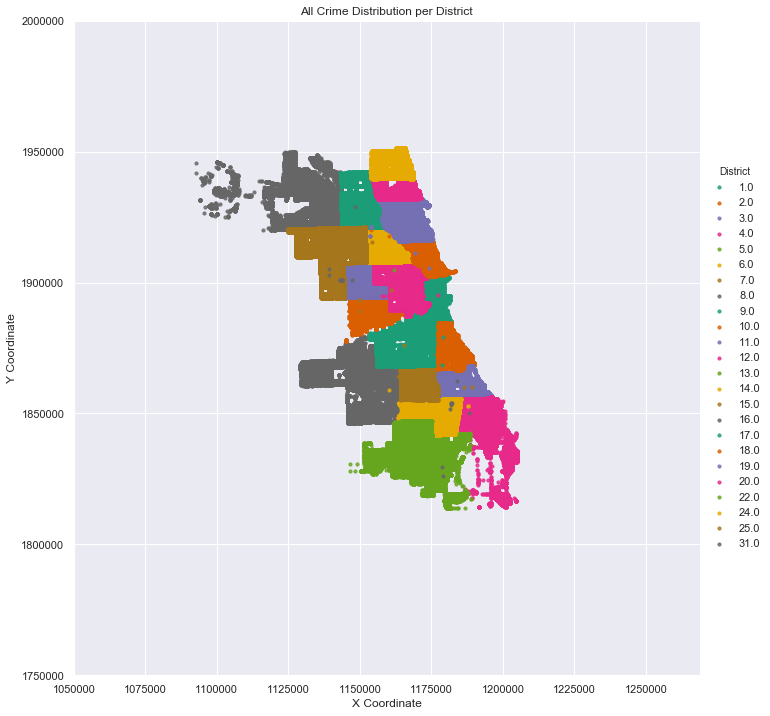

In [45]:
#The following map shows the approximate district borders:
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           height=10,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
plt.xlim(1050000)
plt.ylim(1750000,2000000)
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

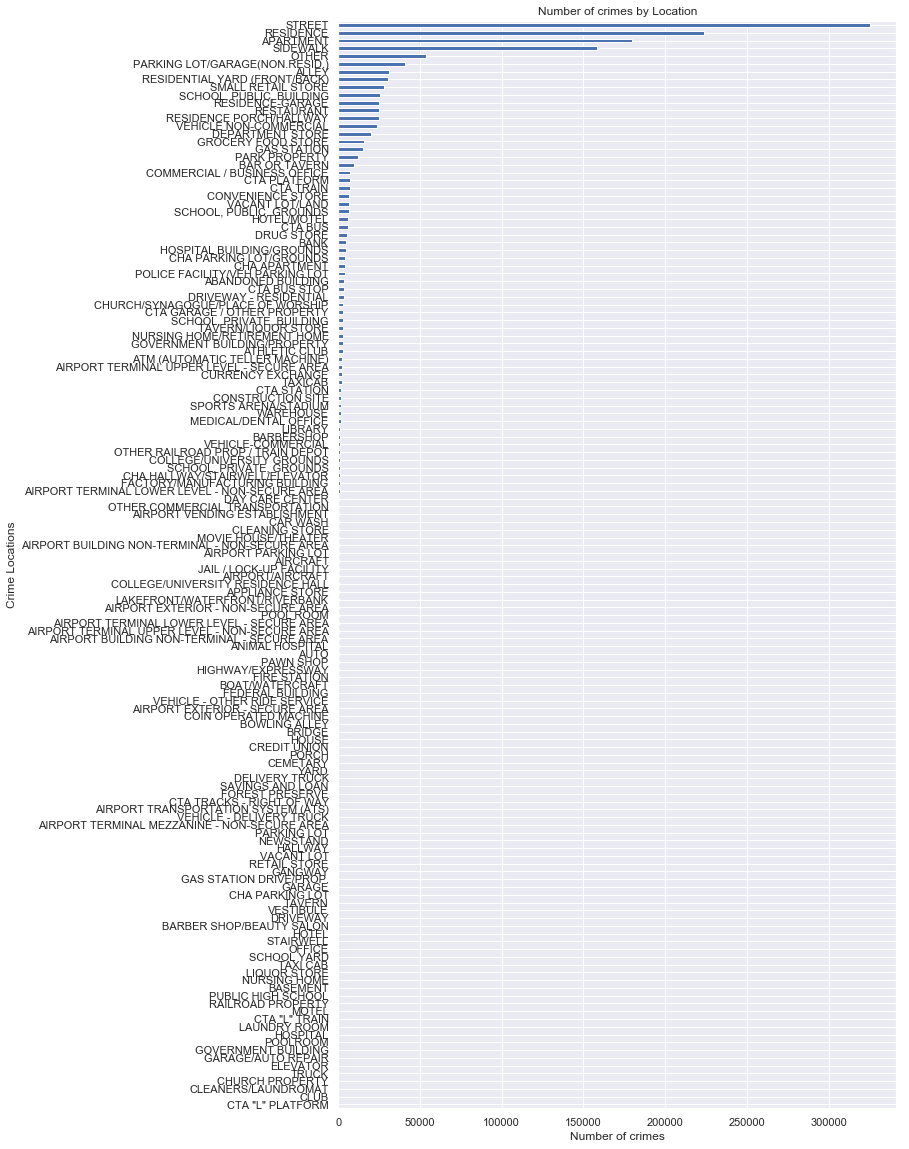

In [46]:
#Which Location recorded most crimes?
plt.figure(figsize=(10,20))
df.groupby([df['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Locations')
plt.xlabel('Number of crimes')
plt.show()

The graphs tells us that most crimes happen on the STREET followed by RESIDENCE, in APARTMENTS or on SIDEWALKS. Again we can see that many Location Descriptions have very few data points and hence can be removed.

In [47]:
location_description=df.groupby([df['Location Description']]).size().sort_values(ascending=True)

location_description=location_description[-20:]
df["Top_20_location_description"]=df["Location Description"].map(lambda x: x if x in location_description else "OTHER")
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time slice,Top_10_primary_type,Top_20_location_description
0,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",Night,BATTERY,APARTMENT
1,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Evening,BATTERY,RESIDENCE
2,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Night,other,STREET
3,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Evening,BATTERY,SIDEWALK
4,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Evening,THEFT,RESIDENCE


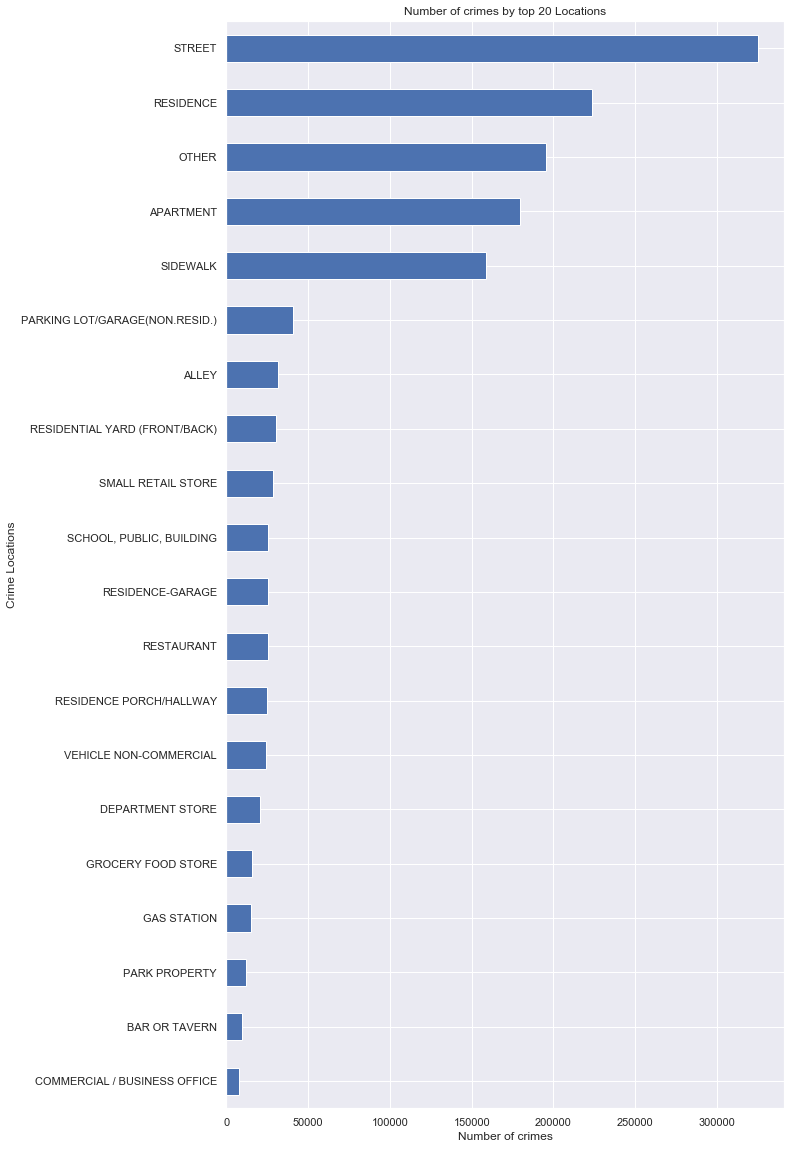

In [48]:
#Which Location recorded most crimes?
plt.figure(figsize=(10,20))
df.groupby([df['Top_20_location_description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by top 20 Locations')
plt.ylabel('Crime Locations')
plt.xlabel('Number of crimes')
plt.show()

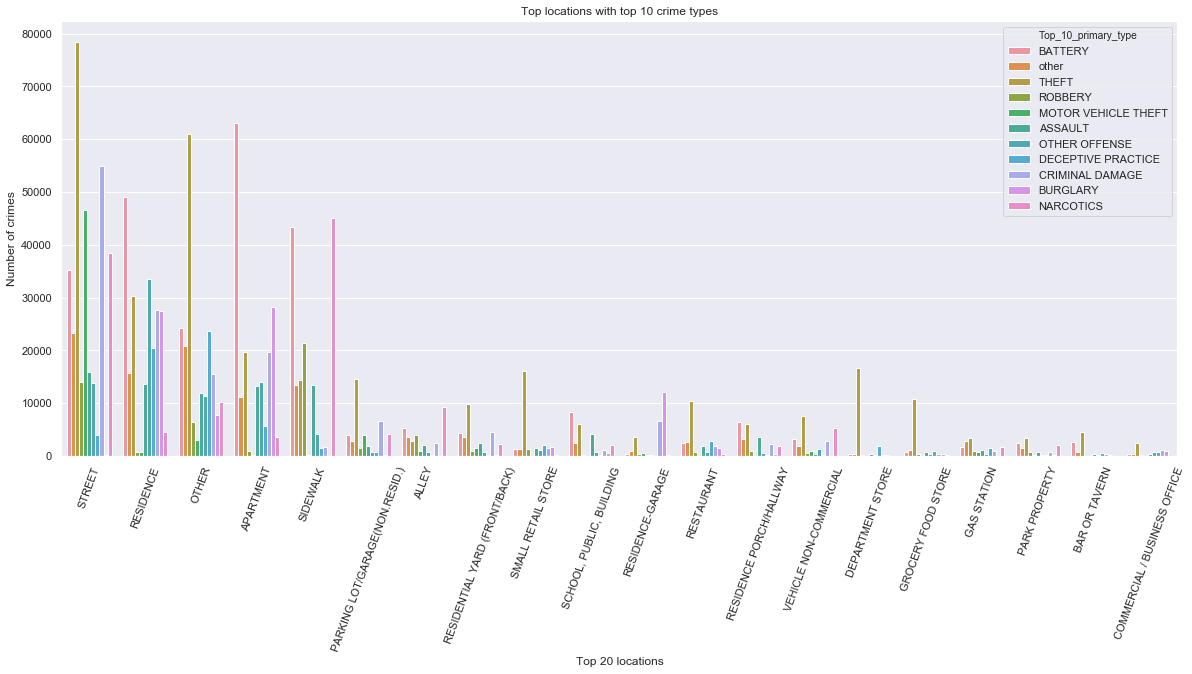

In [49]:
#for one location x ,Which is the most common crime in x?
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='Top_20_location_description', hue='Top_10_primary_type', data=df,order=df['Top_20_location_description'].value_counts().index)
plt.title("Top locations with top 10 crime types")
plt.xlabel("Top 20 locations")
plt.ylabel("Number of crimes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

Text(0.5, 0, 'Arrest')

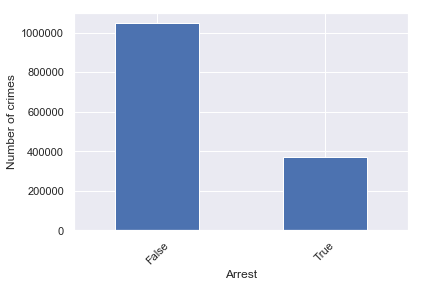

In [50]:
arrest=df["Arrest"].value_counts()
arrest.plot.bar(rot=45)
plt.ylabel("Number of crimes")
plt.xlabel("Arrest")

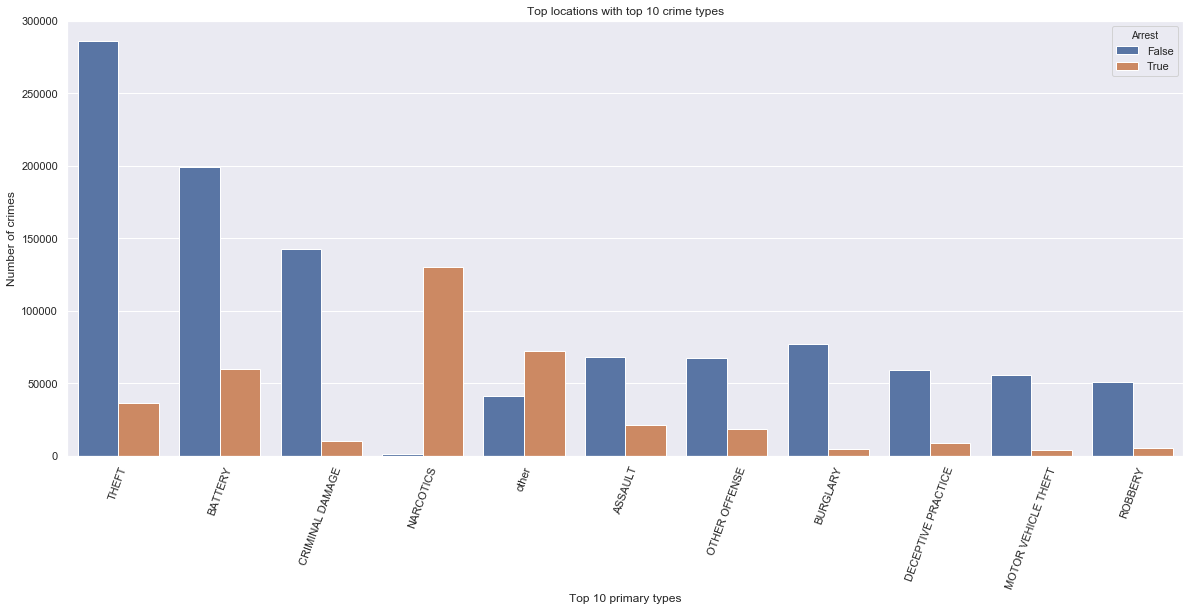

In [51]:
#which most crime type the police arrest
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax = sns.countplot(x='Top_10_primary_type', hue='Arrest', data=df,order=df['Top_10_primary_type'].value_counts().index)
plt.title("Top locations with top 10 crime types")
plt.xlabel("Top 10 primary types")
plt.ylabel("Number of crimes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

Most primary type are of no arrests only NARCOTICS.

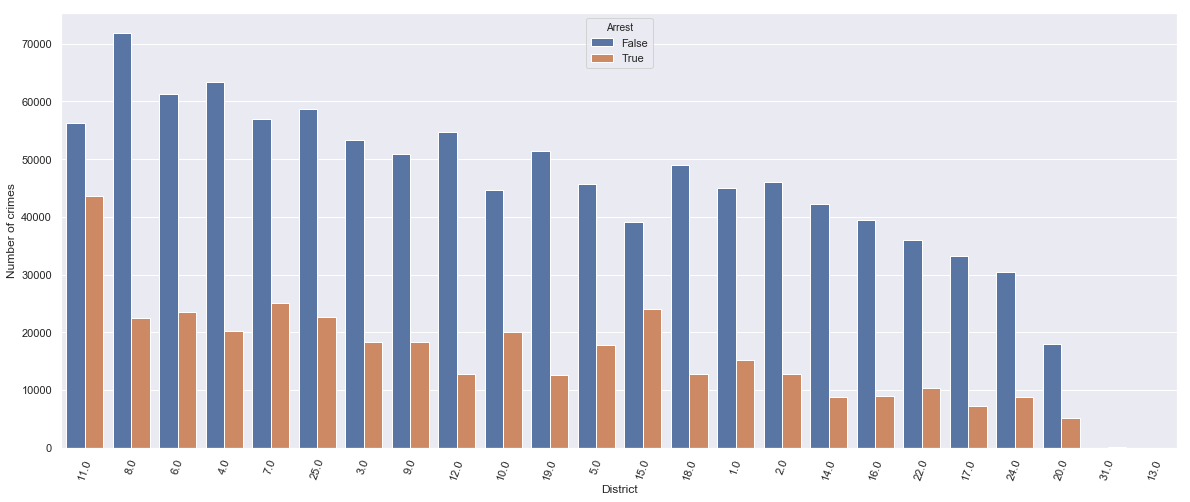

In [52]:
plt.figure(figsize=(20,8)) 
sns.set(style="darkgrid")
ax=sns.countplot(x='District',hue='Arrest',data=df,order=df['District'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('Number of crimes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

Most crimes are of no arrests

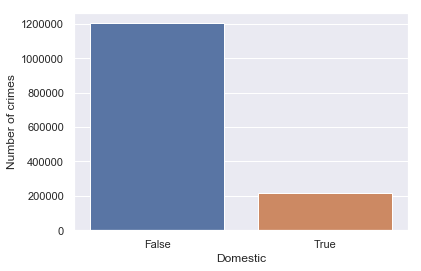

In [53]:
sns.countplot(x='Domestic',data=df)
plt.ylabel('Number of crimes')
plt.show()

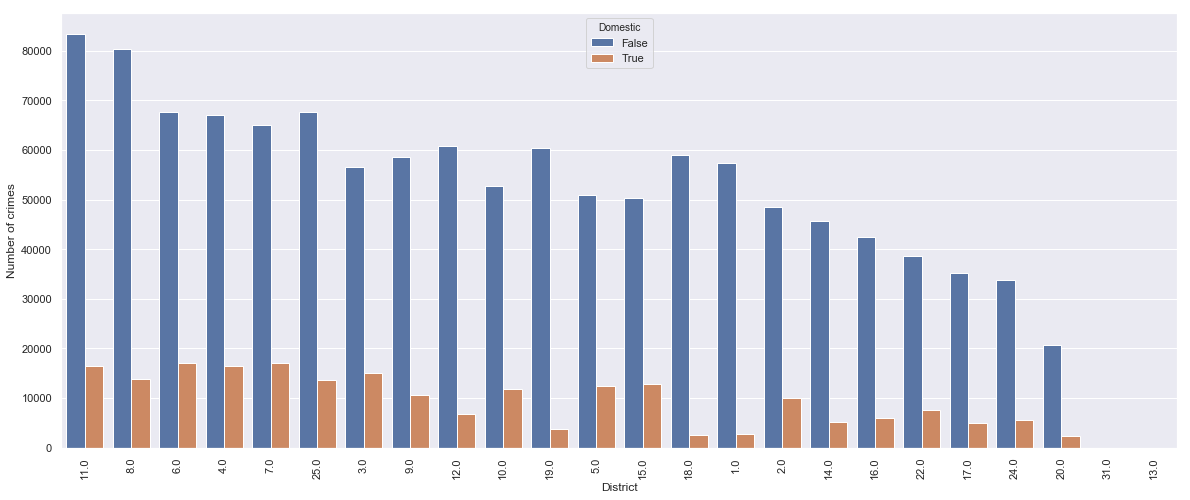

In [54]:
plt.figure(figsize=(20,8)) 
sns.countplot(x='District',hue='Domestic',data=df,order=df['District'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('Number of crimes')
plt.show()

Districts like 13,31,18,1.0 have very few domestic crimes

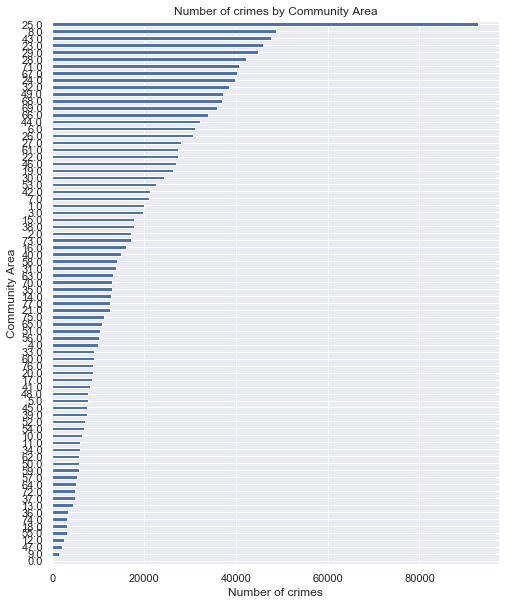

In [55]:
plt.figure(figsize=(8,10))
df.groupby([df['Community Area']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Community Area')
plt.ylabel('Community Area')
plt.xlabel('Number of crimes')
plt.show()

Text(0.5, 1.0, 'All Crime Distribution per Community Area')

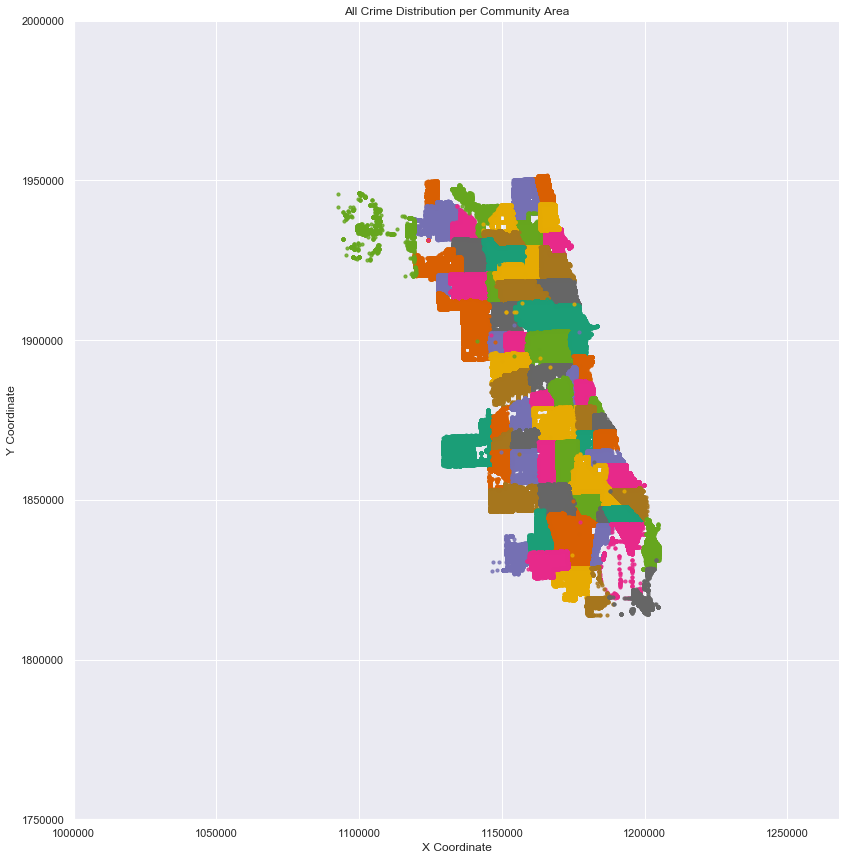

In [56]:

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df[:],
           fit_reg=False, 
           hue="Community Area",
           palette='Dark2',
           legend=False,
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
plt.xlim(1000000)
plt.ylim(1750000,2000000)
ax = plt.gca()
ax.set_title("All Crime Distribution per Community Area")

In [57]:
len(df['Description'].unique())

340

We have 340 descriptions

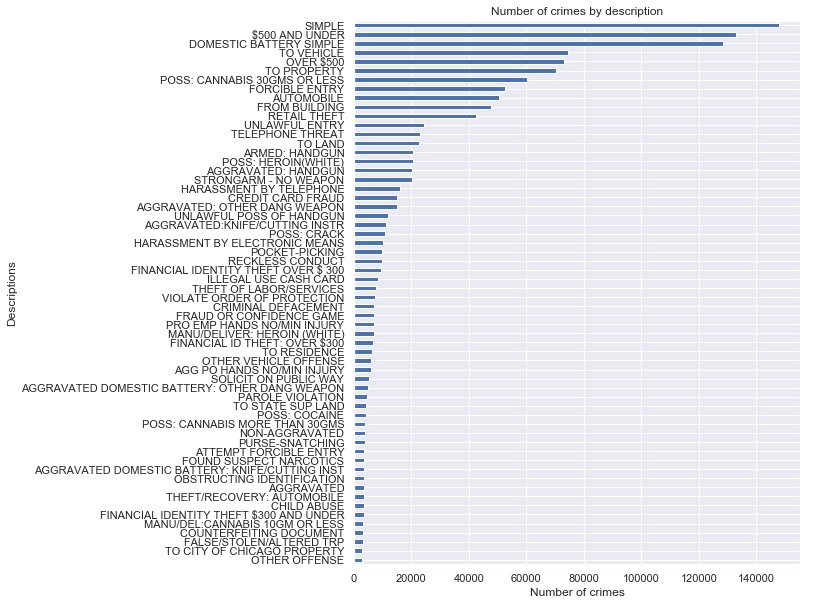

In [58]:
plt.figure(figsize=(8,10))
df.groupby([df['Description']]).size().sort_values(ascending=True)[-60:].plot(kind='barh')
plt.title('Number of crimes by description')
plt.ylabel('Descriptions')
plt.xlabel('Number of crimes')
plt.show()

Data Cleaning

In [59]:
#Do we have rows where year in ‘Date’ does not match the year in ‘Year’ column?
len(df[df.Date.dt.year != df.Year]) 

0

In [60]:
df.shape

(1418315, 24)

In [61]:
#Do we have points which are outside the bounding box of Chicago City?
#Chicago is bounded by the box: 41.6439,-87.9401; 41.9437,-87.58782. 'Y Coordinate'
len(df[(((df.Latitude >= 41.64) & (df.Longitude <= -87.50)) | 
            ((df.Latitude <= 41.94) & (df.Longitude >= -87.94)))])

1418241

1418241< 1418315 (df.shape) <br/>
so we should remove all points which are outside the bounding box of Chicago City.

In [62]:
df=df[(((df.Latitude >= 41.64) & (df.Longitude <= -87.50)) | 
            ((df.Latitude <= 41.94) & (df.Longitude >= -87.94)))]

In [63]:
df.shape

(1418241, 24)

In [64]:
#exploring location column
df['Location']

0          (41.864073157, -87.706818608)
1           (41.782921527, -87.60436317)
2          (41.894908283, -87.758371958)
3          (41.885686845, -87.749515983)
4          (41.886297242, -87.761750709)
5          (41.745354023, -87.603798903)
6          (41.844023772, -87.626923253)
7           (41.811133958, -87.62074077)
8           (41.99813061, -87.665814038)
9          (41.768096835, -87.663878589)
10         (41.761733286, -87.558309979)
11         (41.893026751, -87.626750829)
12         (41.877811861, -87.655758012)
13          (41.843016958, -87.61722727)
14         (41.910900826, -87.686018747)
15         (41.762089133, -87.696632337)
16         (41.908237096, -87.678437417)
17         (41.793935909, -87.625680278)
18         (41.711843569, -87.646607932)
19         (41.815875211, -87.601832565)
20         (41.910116718, -87.677444645)
21         (41.790704614, -87.606141486)
22         (41.927321839, -87.665810418)
23         (41.995961517, -87.797528563)
24         (41.8

This column contains Latitue, Longitude pair only. As we already have that informaton, we can drop this column.

In [65]:
df.drop(['Location'], axis=1, inplace=True)

In [66]:
#Updated On column
#We don't need this
df.drop(['Updated On'], axis=1, inplace=True)

In [67]:
#We don't need unique identifiers like Case Number
df.drop(['Case Number'], axis=1, inplace=True)

In [68]:
#We don't need Top_10_primary_type and Top_20_location_description I used them only for visualization
df.drop(['Top_10_primary_type','Top_20_location_description'], axis=1, inplace=True)

Feature transformation

In [69]:
#Arrest Column
df.Arrest.value_counts()

False    1047229
True      371012
Name: Arrest, dtype: int64

In [70]:
#Label encoder
arrest={False:0, True:1}
df.Arrest.replace(arrest,inplace=True)

In [71]:
df.Arrest.value_counts()

0    1047229
1     371012
Name: Arrest, dtype: int64

In [72]:
#Domestic Column
df.Domestic.value_counts()

False    1203128
True      215113
Name: Domestic, dtype: int64

In [73]:
domestic={False:0, True:1}
df.Domestic.replace(domestic,inplace=True)

In [74]:
df.Domestic.value_counts()

0    1203128
1     215113
Name: Domestic, dtype: int64

In [75]:
#we'll create some new columns like month, dayOfWeek, dayOfMonth, weekOfMonth(wom)
df['Month'] = df.Date.dt.month

df['Day'] =df.Date.dt.day
df['Hour'] =df.Date.dt.hour


In [76]:
#community areas should be from 1-77.
len(df[df['Community Area'] == 0.0])

1

In [77]:
# We'll remove these rows
print('Current rows:', df.shape[0])
df=df[df['Community Area'] != 0.0]
print('Rows after removing Community Area outliers:', df.shape[0])

Current rows: 1418241
Rows after removing Community Area outliers: 1418240


In [78]:
x=df['Primary Type'].value_counts()
x

THEFT                                321940
BATTERY                              258925
CRIMINAL DAMAGE                      152805
NARCOTICS                            131169
ASSAULT                               89503
OTHER OFFENSE                         85355
BURGLARY                              81666
DECEPTIVE PRACTICE                    67605
MOTOR VEHICLE THEFT                   59850
ROBBERY                               56089
CRIMINAL TRESPASS                     36425
WEAPONS VIOLATION                     16982
PUBLIC PEACE VIOLATION                13013
OFFENSE INVOLVING CHILDREN            10589
PROSTITUTION                           7566
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2541
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,PUBLIC INDECENCY,NON - CRIMINAL,OTHER NARCOTIC VIOLATION,HUMAN TRAFFICKING                    0.000014
and NON-CRIMINAL (SUBJECT SPECIFIED) have very less crime numbers and can be removed from the data                      

In [79]:
len(df['Primary Type'].unique())

33

In [80]:
d={'ROBBERY':'THEFT' ,
   'THEFT':'THEFT',
   'BURGLARY':'THEFT',
   'MOTOR VEHICLE THEFT':'THEFT',
   'PUBLIC PEACE VIOLATION':'VIOLATION', 
   'WEAPONS VIOLATION':'VIOLATION',
   'OTHER OFFENSE':'VIOLATION',
   'ASSAULT':'VIOLATION', 
   'OFFENSE INVOLVING CHILDREN':'VIOLATION',
   'INTERFERENCE WITH PUBLIC OFFICER':'VIOLATION',
    'INTIMIDATION':'VIOLATION',
   'SEX OFFENSE':'VIOLATION',
   'CRIMINAL DAMAGE':'Criminal acts',
   'CRIMINAL TRESPASS':'Criminal acts', 
   'CRIM SEXUAL ASSAULT':'Criminal acts',
   'HOMICIDE':'Criminal acts',
   'KIDNAPPING':'Criminal acts', 
   'PROSTITUTION':'VIOLATION' ,
   'HUMAN TRAFFICKING':'Criminal acts',
   'NON - CRIMINAL':'Criminal acts' , 
   'NON-CRIMINAL':'Criminal acts',
   'NARCOTICS':'Others',
   'ARSON':'Criminal acts', 
   'CONCEALED CARRY LICENSE VIOLATION':'Others',
    'NON-CRIMINAL (SUBJECT SPECIFIED)':'Criminal acts',
   'BATTERY':'Criminal acts',
   'OTHER NARCOTIC VIOLATION':'Others', 
   'PUBLIC INDECENCY':'Others', 
   'OBSCENITY':'Others', 
   'GAMBLING':'Others', 
   'LIQUOR LAW VIOLATION':'Others', 
   'STALKING':'Others', 
   'DECEPTIVE PRACTICE':'Others'}
len(d.keys())


33

In [81]:
df["PType"]=df["Primary Type"].map(d)

In [82]:
df.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Time slice,Month,Day,Hour,PType
0,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,1,1,1022,10.0,...,1154907.0,1893681.0,2016,41.864073,-87.706819,Night,5,3,23,Criminal acts
1,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,313,3.0,...,1183066.0,1864330.0,2016,41.782922,-87.604363,Evening,5,3,21,Criminal acts
2,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,0,0,1524,15.0,...,1140789.0,1904819.0,2016,41.894908,-87.758372,Night,5,3,23,VIOLATION
3,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,0,0,1532,15.0,...,1143223.0,1901475.0,2016,41.885687,-87.749516,Evening,5,3,22,Criminal acts
4,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,0,1,1523,15.0,...,1139890.0,1901675.0,2016,41.886297,-87.761751,Evening,5,3,22,THEFT


In [83]:
#print('Current rows:', df.shape[0])
'''
df = df[(df['Primary Type'] != 'OBSCENITY') & 
            (df['Primary Type'] != 'PUBLIC INDECENCY') & 
            (df['Primary Type'] != 'CONCEALED CARRY LICENSE VIOLATION') & 
            (df['Primary Type'] != 'NON-CRIMINAL') & 
            (df['Primary Type'] != 'OTHER NARCOTIC VIOLATION') & 
            (df['Primary Type'] != 'NON - CRIMINAL') & 
            (df['Primary Type'] != 'HUMAN TRAFFICKING') & 
            (df['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)')]

print('Rows after removing primary type outliers:', df.shape[0])'''

"\ndf = df[(df['Primary Type'] != 'OBSCENITY') & \n            (df['Primary Type'] != 'PUBLIC INDECENCY') & \n            (df['Primary Type'] != 'CONCEALED CARRY LICENSE VIOLATION') & \n            (df['Primary Type'] != 'NON-CRIMINAL') & \n            (df['Primary Type'] != 'OTHER NARCOTIC VIOLATION') & \n            (df['Primary Type'] != 'NON - CRIMINAL') & \n            (df['Primary Type'] != 'HUMAN TRAFFICKING') & \n            (df['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)')]\n\nprint('Rows after removing primary type outliers:', df.shape[0])"

In [84]:
df['PType'].unique()

array(['Criminal acts', 'VIOLATION', 'THEFT', 'Others'], dtype=object)

In [85]:
df.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Time slice,Month,Day,Hour,PType
0,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,1,1,1022,10.0,...,1154907.0,1893681.0,2016,41.864073,-87.706819,Night,5,3,23,Criminal acts
1,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,313,3.0,...,1183066.0,1864330.0,2016,41.782922,-87.604363,Evening,5,3,21,Criminal acts
2,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,0,0,1524,15.0,...,1140789.0,1904819.0,2016,41.894908,-87.758372,Night,5,3,23,VIOLATION
3,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,0,0,1532,15.0,...,1143223.0,1901475.0,2016,41.885687,-87.749516,Evening,5,3,22,Criminal acts
4,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,0,1,1523,15.0,...,1139890.0,1901675.0,2016,41.886297,-87.761751,Evening,5,3,22,THEFT


In [86]:
df['Location Description'].value_counts()


STREET                            325047
RESIDENCE                         223851
APARTMENT                         179421
SIDEWALK                          158470
OTHER                              53467
PARKING LOT/GARAGE(NON.RESID.)     40903
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25472
RESIDENCE-GARAGE                   25254
RESTAURANT                         25196
RESIDENCE PORCH/HALLWAY            25001
VEHICLE NON-COMMERCIAL             23994
DEPARTMENT STORE                   20360
GROCERY FOOD STORE                 15742
GAS STATION                        15019
PARK PROPERTY                      12106
BAR OR TAVERN                       9602
COMMERCIAL / BUSINESS OFFICE        7412
CTA PLATFORM                        7173
CTA TRAIN                           6967
CONVENIENCE STORE                   6544
VACANT LOT/LAND                     6507
SCHOOL, PUBLIC, 

In [87]:
print("We have "+str(len(df['Location Description'].unique()))+" locations description")
print("We'll  keep only crimes in top 50 locations")
print('Current rows:', df.shape[0])
top_50_locations = list(df.groupby([df['Location Description']]).size().sort_values(ascending=True)[-50:].index)
df = df[df['Location Description'].isin(top_50_locations)]
print('Rows after removing location outliers:', df.shape[0])

We have 140 locations description
We'll  keep only crimes in top 50 locations
Current rows: 1418240
Rows after removing location outliers: 1394712


In [88]:
print("We have "+str(len(df['Description'].unique()))+" descriptions")
print("We'll  keep only crimes with top 110 descriptions")
print('Current rows:', df.shape[0])
top_110_description = list(df.groupby([df['Description']]).size().sort_values(ascending=True)[-110:].index)
df = df[df['Description'].isin(top_110_description)]
print('Rows after removing description outliers:', df.shape[0])

We have 339 descriptions
We'll  keep only crimes with top 110 descriptions
Current rows: 1394712
Rows after removing description outliers: 1361846


In [89]:
#Label encoder
time={'Morning':0, 'Afternoon':1, 'Evening':2,'Night':3}
df["Time slice"].replace(time,inplace=True)

In [90]:
data=df.copy()

In [91]:
#Label encoder

Ptype={'THEFT':0, 'Criminal acts':1, 'VIOLATION':2,'Others':3}
df["PType"].replace(Ptype,inplace=True)



In [92]:
corrmat = df.corr() 
corrmat

,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Time slice,Month,Day,Hour,PType
Arrest,1.000000,-0.058883,-0.021289,-0.021076,-0.010466,0.015716,-0.035582,-0.022992,-0.053307,-0.022797,-0.036221,0.031575,-0.039664,-0.004731,0.086448,0.433632
Domestic,-0.058883,1.000000,-0.047028,-0.046824,-0.065131,0.078731,0.010447,-0.085130,0.019888,-0.084988,0.009178,0.035905,-0.008230,-0.000842,-0.040784,0.057342
Beat,-0.021289,-0.047028,1.000000,0.997324,0.682923,-0.501564,-0.562576,0.640163,-0.009011,0.640970,-0.557604,0.032575,-0.001425,-0.001389,-0.010406,-0.022789
District,-0.021076,-0.046824,0.997324,1.000000,0.686714,-0.501555,-0.565903,0.641499,-0.005499,0.642317,-0.560940,0.032760,0.001822,-0.001114,-0.010271,-0.022507
Ward,-0.010466,-0.065131,0.682923,0.686714,1.000000,-0.553373,-0.457956,0.660469,0.002115,0.660813,-0.451756,0.018778,0.004674,-0.001411,-0.005429,-0.024847
Community Area,0.015716,0.078731,-0.501564,-0.501555,-0.553373,1.000000,0.286410,-0.791434,-0.009841,-0.790795,0.276891,-0.021665,-0.008916,0.000095,0.006418,0.038944
X Coordinate,-0.035582,0.010447,-0.562576,-0.565903,-0.457956,0.286410,1.000000,-0.561524,-0.000643,-0.564201,0.999919,-0.006866,0.003857,0.002077,-0.003644,-0.055823
Y Coordinate,-0.022992,-0.085130,0.640163,0.641499,0.660469,-0.791434,-0.561524,1.000000,0.007164,0.999995,-0.551019,0.017573,0.006765,-0.000174,-0.007073,-0.041167
Year,-0.053307,0.019888,-0.009011,-0.005499,0.002115,-0.009841,-0.000643,0.007164,1.000000,0.007152,-0.000527,0.000753,0.017479,0.006297,0.004975,-0.013508
Latitude,-0.022797,-0.084988,0.640970,0.642317,0.660813,-0.790795,-0.564201,0.999995,0.007152,1.000000,-0.553719,0.017564,0.006735,-0.000181,-0.007041,-0.040862


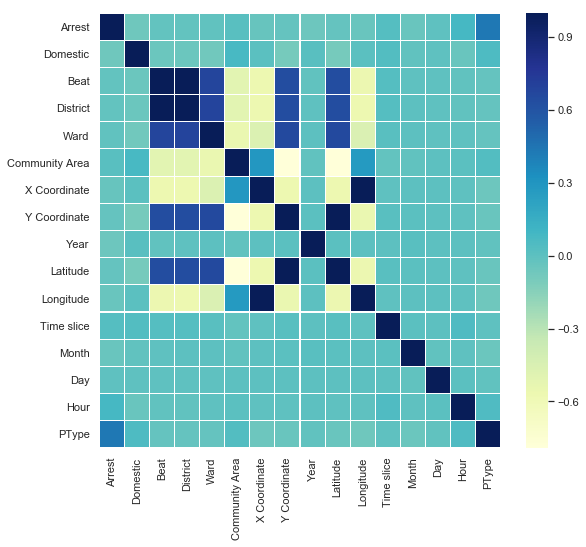

In [93]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

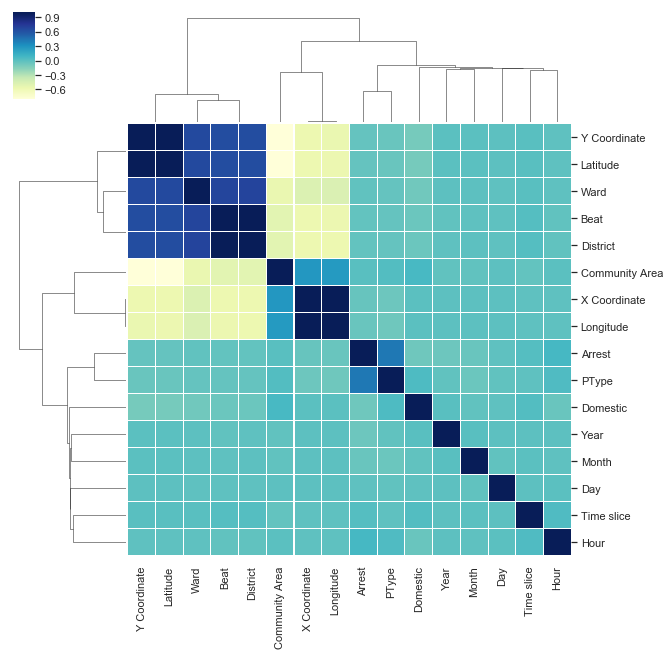

In [94]:
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)   
cg 

beat and District are SO correlated(kind of same values) <br/>
Same for (X Coordinate, Latitude) and (Y Coordinate, Longitude)

<h1> Target= Arrest </h1>

In [95]:
#Choosing the features as x and the target as y
x=df[['District','Longitude','Latitude','Year','Month','Day','Time slice','PType']]
y=df['Arrest']

<h2> Logistic model </h2>

In [96]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.80


In [97]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)

predicted       0      1
actuel                  
0          334821  19987
1           74482  47357


In [98]:
#Classification Report(precesion recall f1-score support)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88    354808
           1       0.70      0.39      0.50    121839

   micro avg       0.80      0.80      0.80    476647
   macro avg       0.76      0.67      0.69    476647
weighted avg       0.79      0.80      0.78    476647



Text(0.5, 1.05, 'Confusion_matrix')

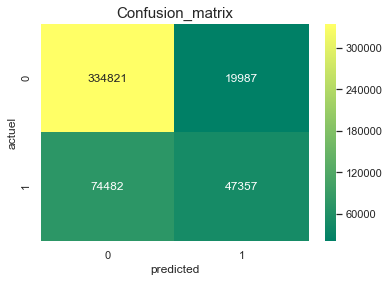

In [99]:
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h1>KNN</h1>

In [100]:

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.810813872740204


In [101]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [102]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [103]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
#Predict probabilities for the test data.
probs = logreg.predict_proba(x_test)
#Keep Probabilities of the positive class only.
probs = probs[:, 1]
#Compute the AUC Score.
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.76


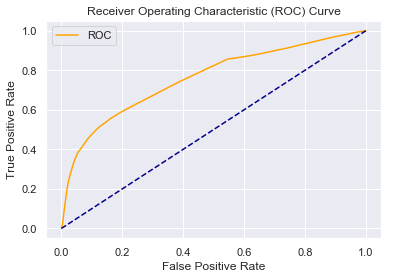

In [104]:
#Get the ROC Curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)
#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

<h2> Decision Tree </h2>

In [105]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [106]:
#applying tree algorithm
Tree = tree.DecisionTreeClassifier()  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7519107431705224


import graphviz
dot_data= tree.export_graphviz(Tree, out_file=None)
graph= graphviz.Source(dot_data)
graph.render("data")
graph

<h2> Random Forest </h2>

In [107]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [108]:
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8176868835847073


<h2> Target = Primary type </h2>

In [109]:
#Choosing the features as x and the target as y
xPT=df[['District','Longitude','Latitude','Month','Day','Time slice']]
yPT=df['PType']

<h2> logistic model </h2>


In [110]:
x_train,x_test,y_train,y_test=train_test_split(xPT,yPT,test_size=0.33,random_state=42) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.40


predicted       0      1
actuel                  
0          119100  48513
1           85448  62095
2           44572  26163
3           42188  21331


C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.41      0.71      0.52    167613
           1       0.39      0.42      0.41    147543
           2       0.00      0.00      0.00     70735
           3       0.00      0.00      0.00     63519

   micro avg       0.40      0.40      0.40    449410
   macro avg       0.20      0.28      0.23    449410
weighted avg       0.28      0.40      0.33    449410



C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.05, 'Confusion_matrix')

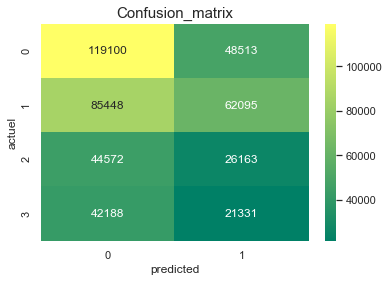

In [111]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2> KNN </h2>

In [112]:
knn=KNeighborsClassifier(n_neighbors=10) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy={:.2f}'.format(accuracy_score(y_pred,y_test)))

Accuracy=0.39


predicted       0      1     2     3
actuel                              
0          101854  51641  7602  6516
1           72292  59890  7798  7563
2           35032  26483  4997  4223
3           30159  21757  3810  7793
              precision    recall  f1-score   support

           0       0.43      0.61      0.50    167613
           1       0.37      0.41      0.39    147543
           2       0.21      0.07      0.11     70735
           3       0.30      0.12      0.17     63519

   micro avg       0.39      0.39      0.39    449410
   macro avg       0.33      0.30      0.29    449410
weighted avg       0.36      0.39      0.36    449410



Text(0.5, 1.05, 'Confusion_matrix')

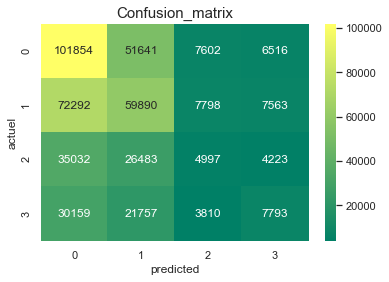

In [113]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2>Decision Tree</h2>

In [114]:
#applying tree algorithm
Tree = tree.DecisionTreeClassifier()  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("Accuracy={:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy=0.37


import graphviz
dot_data= tree.export_graphviz(Tree, out_file=None)
graph= graphviz.Source(dot_data)
graph.render("data")
graph

<h2> RandomForestClassifier </h2>

In [115]:
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy={:.2f}".format( metrics.accuracy_score(y_test, y_pred)))  #Measuring the accuracy of our model

Accuracy=0.40


<h1>one hot with PType</h1>

In [116]:
one_hot=pd.get_dummies(data['PType'])

data=data.drop('PType',axis=1)
data=data.join(one_hot)

In [117]:
data.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Latitude,Longitude,Time slice,Month,Day,Hour,Criminal acts,Others,THEFT,VIOLATION
0,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,1,1,1022,10.0,...,41.864073,-87.706819,3,5,3,23,1,0,0,0
1,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,313,3.0,...,41.782922,-87.604363,2,5,3,21,1,0,0,0
2,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,0,0,1524,15.0,...,41.894908,-87.758372,3,5,3,23,0,0,0,1
3,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,0,0,1532,15.0,...,41.885687,-87.749516,2,5,3,22,1,0,0,0
4,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,0,1,1523,15.0,...,41.886297,-87.761751,2,5,3,22,0,0,1,0


<h2> Target=Criminal acts </h2>

In [118]:
#Choosing the features as x and the target as y
xPT2=data[['District','Longitude','Latitude','Month','Day','Time slice']]
yPT2=data['Criminal acts']


<h2> logistic model </h2>


In [119]:


# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

x_train,x_test,y_train,y_test=train_test_split(xPT2,yPT2,test_size=0.35,random_state=42) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.67


In [120]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)


predicted       0
actuel           
0          320172
1          156475


In [121]:
#Classification Report(precesion recall f1-score support)

print(classification_report(y_test,y_pred))

C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.67      1.00      0.80    320172
           1       0.00      0.00      0.00    156475

   micro avg       0.67      0.67      0.67    476647
   macro avg       0.34      0.50      0.40    476647
weighted avg       0.45      0.67      0.54    476647



C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.05, 'Confusion_matrix')

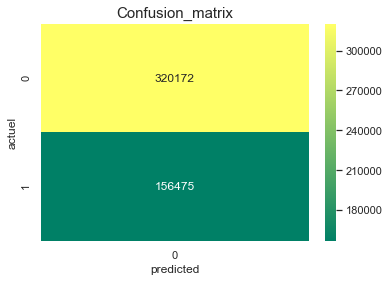

In [122]:
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2>KNN</h2>


In [123]:

knn=KNeighborsClassifier(n_neighbors=10) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy={:.2f}'.format(accuracy_score(y_pred,y_test)))

Accuracy=0.65


predicted       0      1
actuel                  
0          291031  29141
1          136626  19849
              precision    recall  f1-score   support

           0       0.68      0.91      0.78    320172
           1       0.41      0.13      0.19    156475

   micro avg       0.65      0.65      0.65    476647
   macro avg       0.54      0.52      0.49    476647
weighted avg       0.59      0.65      0.59    476647



Text(0.5, 1.05, 'Confusion_matrix')

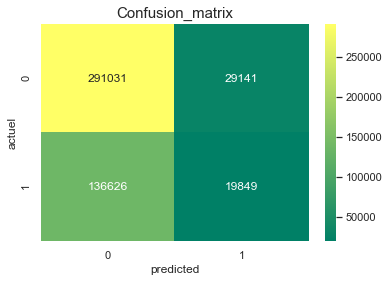

In [124]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2>Decision Tree</h2>

In [125]:
#applying tree algorithm
Tree = tree.DecisionTreeClassifier()  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("Accuracy={:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy=0.59


import graphviz
dot_data= tree.export_graphviz(Tree, out_file=None)
graph= graphviz.Source(dot_data)
graph.render("data")
graph

<h2> RandomForestClassifier </h2>

In [126]:
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy={:.2f}".format( metrics.accuracy_score(y_test, y_pred)))  #Measuring the accuracy of our model

Accuracy=0.64


<h3> Target= VIOLATION </h3 >

In [127]:
#Choosing the features as x and the target as y
xPT2=data[['District','Longitude','Latitude','Month','Day','Time slice']]
yPT2=data['VIOLATION']


<h2> logistic model </h2>

In [128]:


# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

x_train,x_test,y_train,y_test=train_test_split(xPT2,yPT2,test_size=0.35,random_state=42) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


predicted       0
actuel           
0          401557
1           75090


C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.84      1.00      0.91    401557
           1       0.00      0.00      0.00     75090

   micro avg       0.84      0.84      0.84    476647
   macro avg       0.42      0.50      0.46    476647
weighted avg       0.71      0.84      0.77    476647



C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.05, 'Confusion_matrix')

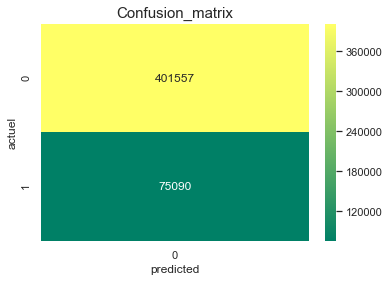

In [129]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2> KNN </h2>


In [130]:

knn=KNeighborsClassifier(n_neighbors=10) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy={:.2f}'.format(accuracy_score(y_pred,y_test)))

Accuracy=0.84


predicted       0     1
actuel                 
0          400096  1461
1           74554   536
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    401557
           1       0.27      0.01      0.01     75090

   micro avg       0.84      0.84      0.84    476647
   macro avg       0.56      0.50      0.46    476647
weighted avg       0.75      0.84      0.77    476647



Text(0.5, 1.05, 'Confusion_matrix')

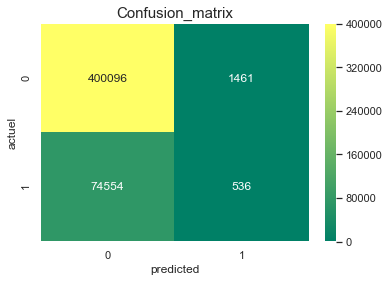

In [131]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2> Tree </h2>


In [132]:
#applying tree algorithm
Tree = tree.DecisionTreeClassifier()  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("Accuracy={:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy=0.74


import graphviz
dot_data= tree.export_graphviz(Tree, out_file=None)
graph= graphviz.Source(dot_data)
graph.render("data")
graph

<h2> Random Forest </h2>


In [133]:
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy={:.2f}".format( metrics.accuracy_score(y_test, y_pred)))  #Measuring the accuracy of our model

Accuracy=0.83


<h3> Target= THEFT </h3 >

In [134]:
#Choosing the features as x and the target as y
xPT2=data[['District','Longitude','Latitude','Month','Day','Time slice']]
yPT2=data['THEFT']

<h2> logistic model </h2>


In [135]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

x_train,x_test,y_train,y_test=train_test_split(xPT2,yPT2,test_size=0.35,random_state=42) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.63


predicted       0     1
actuel                 
0          294519  4390
1          174264  3474
              precision    recall  f1-score   support

           0       0.63      0.99      0.77    298909
           1       0.44      0.02      0.04    177738

   micro avg       0.63      0.63      0.63    476647
   macro avg       0.54      0.50      0.40    476647
weighted avg       0.56      0.63      0.50    476647



Text(0.5, 1.05, 'Confusion_matrix')

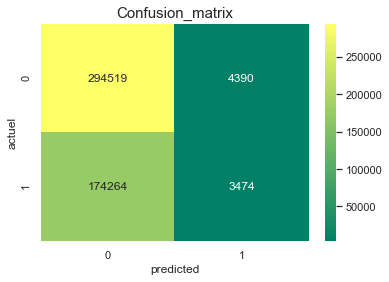

In [136]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2> KNN </h2>


In [137]:

knn=KNeighborsClassifier(n_neighbors=10) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy={:.2f}'.format(accuracy_score(y_pred,y_test)))

Accuracy=0.63


predicted       0      1
actuel                  
0          257674  41235
1          135919  41819
              precision    recall  f1-score   support

           0       0.65      0.86      0.74    298909
           1       0.50      0.24      0.32    177738

   micro avg       0.63      0.63      0.63    476647
   macro avg       0.58      0.55      0.53    476647
weighted avg       0.60      0.63      0.59    476647



Text(0.5, 1.05, 'Confusion_matrix')

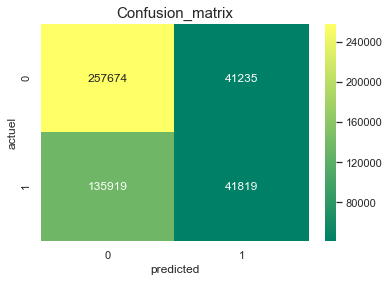

In [138]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2> Tree </h2>


In [139]:
#applying tree algorithm
Tree = tree.DecisionTreeClassifier()  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("Accuracy={:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy=0.59


<h2> Random Forest</h2>


In [140]:
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy={:.2f}".format( metrics.accuracy_score(y_test, y_pred)))  #Measuring the accuracy of our model

Accuracy=0.64


<h3> Target= Others </h3 >

In [141]:
#Choosing the features as x and the target as y
xPT2=data[['District','Longitude','Latitude','Month','Day','Time slice']]
yPT2=data['Others']

<h2> logistic model</h2>


In [142]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

x_train,x_test,y_train,y_test=train_test_split(xPT2,yPT2,test_size=0.35,random_state=42) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.86


predicted       0
actuel           
0          409303
1           67344


C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.86      1.00      0.92    409303
           1       0.00      0.00      0.00     67344

   micro avg       0.86      0.86      0.86    476647
   macro avg       0.43      0.50      0.46    476647
weighted avg       0.74      0.86      0.79    476647



C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\malek\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1.05, 'Confusion_matrix')

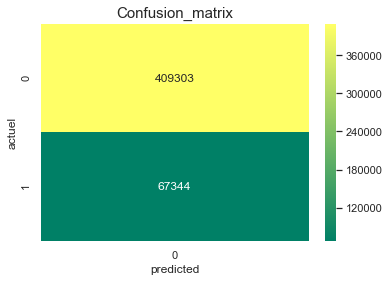

In [143]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2> KNN</h2>


In [144]:

knn=KNeighborsClassifier(n_neighbors=10) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy={:.2f}'.format(accuracy_score(y_pred,y_test)))

Accuracy=0.86


predicted       0     1
actuel                 
0          405628  3675
1           65014  2330
              precision    recall  f1-score   support

           0       0.86      0.99      0.92    409303
           1       0.39      0.03      0.06     67344

   micro avg       0.86      0.86      0.86    476647
   macro avg       0.62      0.51      0.49    476647
weighted avg       0.79      0.86      0.80    476647



Text(0.5, 1.05, 'Confusion_matrix')

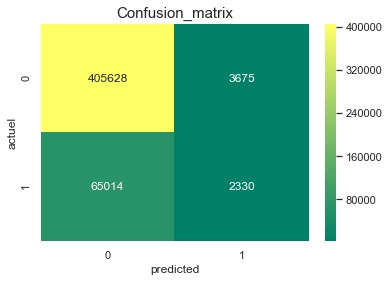

In [145]:
#confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuel'],colnames=["predicted"])
print(confusion_matrix)
#Classification Report(precesion recall f1-score support)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

<h2> Tree</h2>


In [146]:
#applying tree algorithm
Tree = tree.DecisionTreeClassifier()  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("Accuracy={:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy=0.78


<h2> Random Forest</h2>


In [147]:
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy={:.2f}".format( metrics.accuracy_score(y_test, y_pred)))  #Measuring the accuracy of our model

Accuracy=0.85


Conclusion: </br></br>

Using multinomial prediction I am not able to get good accuracy</br>
In order to solve the problem and improve the scores, I decided to break down primary type attribute into new targets. </br>
In this case, I transformed the problem into a binary classification problem. Thus, every label in primary type becomes a new variable.</br>
I trained and tested different machine learning models to predict the new variables</br>
I noticed a better improvement in the accuracy scores after the transformation. The accuracy varies from one variable to another.</br></br>

Self-reflection:</br></br>

Even though the accuracy is good, I noticed that the recall does not have a good score. This can be due to imbalanced data (label 0 absent is more frequent than 1)! (To check!)
</br>


Optimization!